# Vishal's Homework

#mlops_zoomcamp_04_homework_model_deployment

## Q1. Run this notebook for the March 2023 data. What's the standard deviation of the predicted duration for this dataset?
1.24

6.24

12.28

18.28

## Vishal's Answer : 6.24

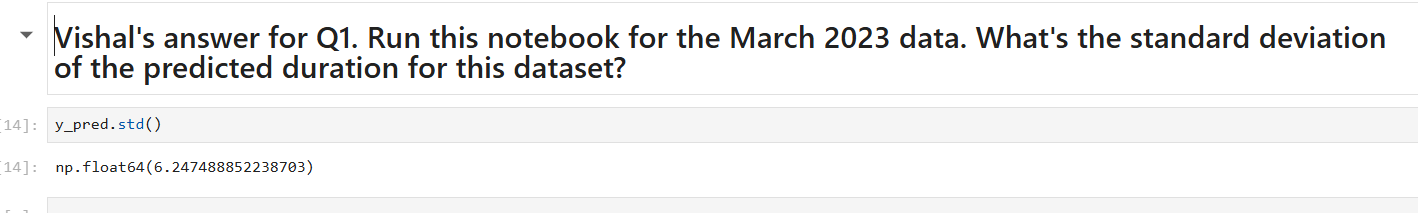

## Q2. What's the size of the output file?

36M

46M

56M

66M

Vishal's Answer : 66 M

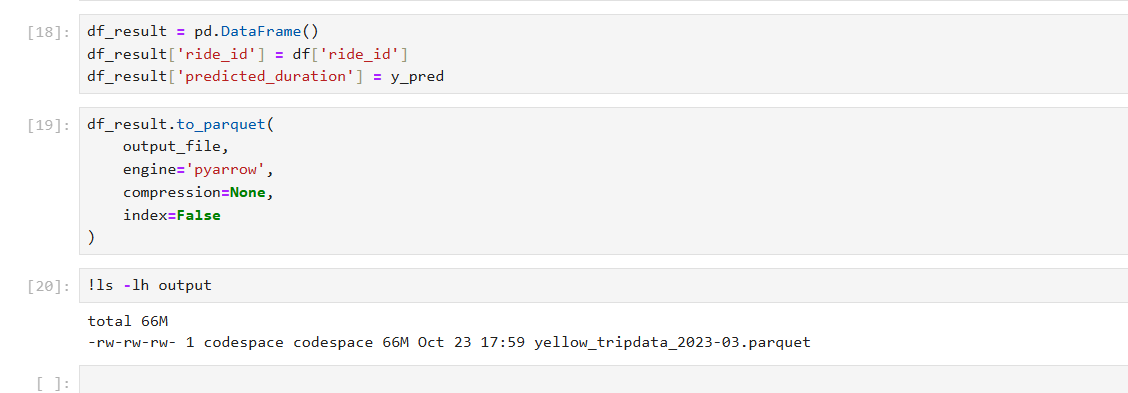



## Q3. Creating the scoring script
Now let's turn the notebook into a script.

Which command you need to execute for that?



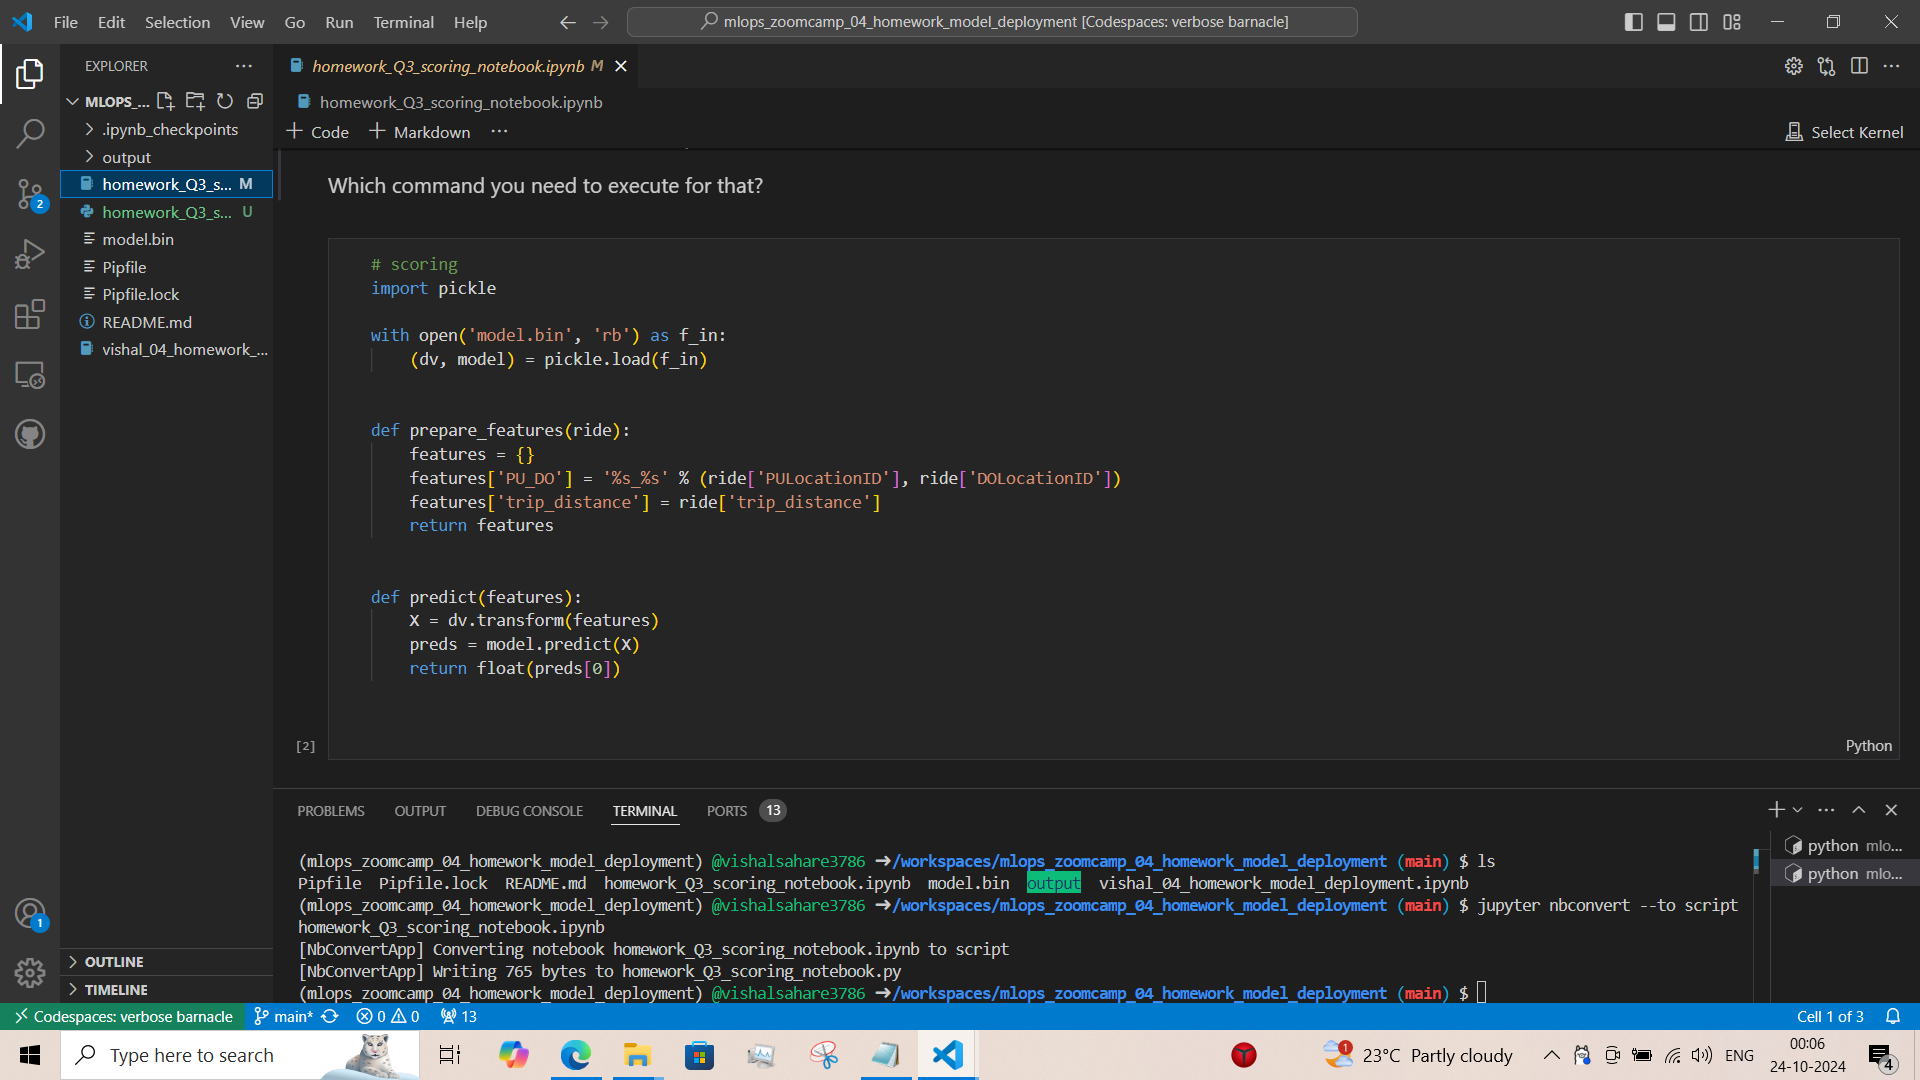

## Q4. Virtual environment
Now let's put everything into a virtual environment. We'll use pipenv for that.

Install all the required libraries. Pay attention to the Scikit-Learn version: it should be the same as in the starter notebook.

After installing the libraries, pipenv creates two files: Pipfile and Pipfile.lock. The Pipfile.lock file keeps the hashes of the dependencies we use for the virtual env.

What's the first hash for the Scikit-Learn dependency?

## Q5. Parametrize the script
Let's now make the script configurable via CLI. We'll create two parameters: year and month.

Run the script for April 2023.

What's the mean predicted duration?

7.29
14.29
21.29
28.29
Hint: just add a print statement to your script.

## Q6. Docker container
Now run the script with docker. What's the mean predicted duration for May 2023?
0.19

7.24

14.24

21.19

In [2]:
import pickle
import pandas as pd
import sklearn

In [3]:
sklearn.__version__

'1.5.0'

In [4]:
year = 2023
month = 3

input_file = f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year:04d}-{month:02d}.parquet'
output_file = f'output/yellow_tripdata_{year:04d}-{month:02d}.parquet'

In [5]:
year = 2023
month = 3

input_file = f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year:04d}-{month:02d}.parquet'
output_file = f'output/yellow_tripdata_{year:04d}-{month:02d}.parquet'

In [6]:
!mkdir output

mkdir: cannot create directory ‘output’: File exists


In [7]:
with open('model.bin', 'rb') as f_in:
    dv, lr = pickle.load(f_in)

In [8]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [10]:
df = read_data(input_file)
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')

In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration,ride_id
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,...,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00,10.000000,2023/03_0
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,...,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25,31.083333,2023/03_1
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,...,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00,14.366667,2023/03_2
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,...,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00,11.466667,2023/03_3
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,...,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00,3.033333,2023/03_4


In [12]:
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_pred = lr.predict(X_val)

In [13]:
y_pred

array([16.24590642, 26.1347962 , 11.88426424, ..., 11.59533603,
       13.11317847, 12.89999218])

## Vishal's answer for Q1. Run this notebook for the March 2023 data. What's the standard deviation of the predicted duration for this dataset?

In [14]:
y_pred.std()

np.float64(6.247488852238703)

## Q2. What's the size of the output file?

36M

46M

56M

66M

In [18]:
df_result = pd.DataFrame()
df_result['ride_id'] = df['ride_id']
df_result['predicted_duration'] = y_pred

In [19]:
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)

In [20]:
!ls -lh output

total 66M
-rw-rw-rw- 1 codespace codespace 66M Oct 23 17:59 yellow_tripdata_2023-03.parquet


## Q3. Creating the scoring script
Now let's turn the notebook into a script.

Which command you need to execute for that?